In [ ]:
!wget --no-check-certificate https://storage.googleapis.com/platzi-tf2/sign-language-img.zip \
    -O ./data/sign-language-img.zip

In [ ]:
import os
import zipfile

local_zip = "./data/sign-language-img.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("./data/sign-language-img")
zip_ref.close()

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import string
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_dir = "./data/sign-language-img/Train"
test_dir = "./data/sign-language-img/Test"

In [3]:
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255, validation_split= 0.2)

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size= (28,28),
    batch_size= 128,
    class_mode="categorical",
    color_mode="grayscale",
    subset="training"
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size= (28,28),
    batch_size= 128,
    class_mode="categorical",
    color_mode="grayscale",
    subset="validation"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size= (28,28),
    batch_size= 128,
    class_mode="categorical",
    color_mode="grayscale"
)

Found 27455 images belonging to 24 classes.
Found 1425 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.


In [7]:
classes = [char for char in string.ascii_uppercase if char != "J" if char != "Z"]
classes

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y']

In [9]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize = (10, 10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img[:,:,0])
        ax.axis("off")
    plt.tight_layout()
    plt.show()

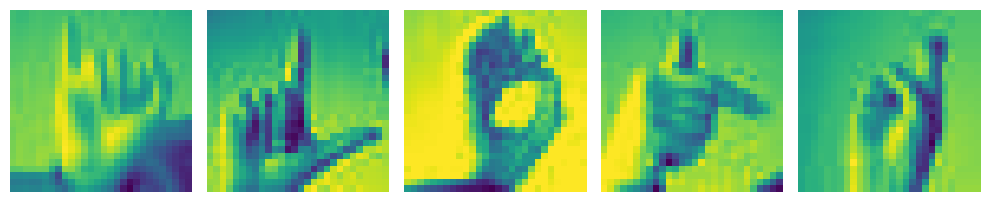

In [10]:
sample_training_images, _ = next(train_generator)
plotImages(sample_training_images[:5])